# Employee Attrition Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
data = pd.read_csv('employee_attrition_data.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Checking for missing values

In [4]:
data.isnull().sum().max()  # We have no missing values

0

In [5]:
# Attrition YES means the employee has left the company
# Attrition NO means the employee has not left the company

In [6]:
data.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [7]:
checkpoint_1 = data.copy()

In [8]:
data.BusinessTravel = data['BusinessTravel'].map({'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2})
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,2,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,1,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,2,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,1,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
checkpoint_2 = data.copy()

In [10]:
data.drop(['EmployeeCount', 'EmployeeNumber'], axis=1, inplace=True)
data.columns.values

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [11]:
pd.options.display.max_columns=None

In [12]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,2,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,1,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,2,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,1,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [13]:
data.Attrition = data['Attrition'].map({'Yes':1, 'No':0})
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [14]:
data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

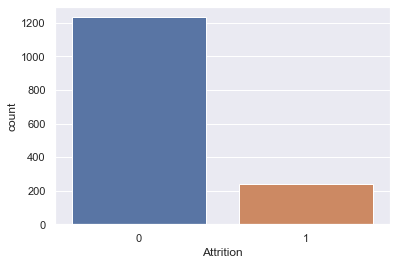

In [15]:
sns.countplot(data['Attrition']);

#### Since our data is imbalanced, we have to use one of the techniques to balance the dataset

In [16]:
checkpoint_3 = data.copy()

## Exploratory Data Analysis

In [17]:
data.StandardHours.unique()

array([80], dtype=int64)

In [18]:
data.drop(['StandardHours'], axis=1, inplace=True)


In [19]:
data.Over18.unique()

array(['Y'], dtype=object)

In [20]:
data.drop('Over18', axis=1, inplace=True)

#### OverTime

In [21]:
data.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [22]:
data['OverTime'] = data['OverTime'].map({'Yes':1, 'No':0})

In [23]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


#### Department

In [24]:
data.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [25]:
dummy = pd.get_dummies(data.Department, drop_first=True)  #Dummy variable for Department
dummy.head()

,Research & Development,Sales
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [26]:
data = pd.concat([data, dummy], axis=1)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Research & Development,Sales
0,41,1,1,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1
1,49,0,2,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0
2,37,1,1,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0
4,27,0,1,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,1,0


In [27]:
data.columns.values

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Research & Development', 'Sales'], dtype=object)

In [28]:
columns_reordered = [ 'Attrition','Age', 'BusinessTravel', 'DailyRate', 'Research & Development','Sales',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [29]:
checkpoint_4 = data.copy()

In [30]:
data = data[columns_reordered]
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Research & Development,Sales,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,0,1,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0,49,2,279,1,0,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,1,37,1,1373,1,0,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0,33,2,1392,1,0,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0,27,1,591,1,0,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


#### Age

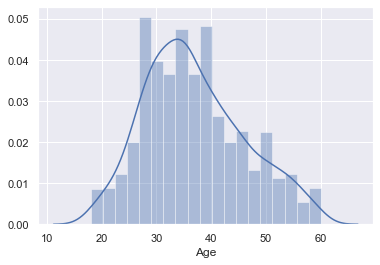

In [31]:
sns.distplot(data.Age);

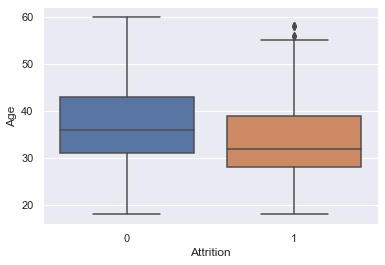

In [32]:
sns.boxplot(data.Attrition, data.Age);

#### Daily Rate & Hourly Rate

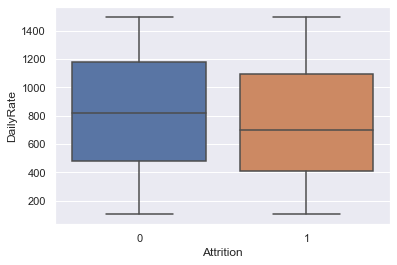

In [33]:
sns.boxplot(data.Attrition, data.DailyRate);

In [34]:
corr_matrix = data.corr()
print(corr_matrix.loc['DailyRate','Attrition'])
print(corr_matrix.loc['HourlyRate', 'Attrition'])

-0.05665199186762916
-0.006845549572139824


#### Since DailyRate has a higher correlation with Attrition than HourlyRate, we drop HourlyRate

In [35]:
# Dropping HourlyRate
data.drop('HourlyRate', axis=1, inplace=True)

In [36]:
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Research & Development,Sales,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,0,1,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0,49,2,279,1,0,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,1,37,1,1373,1,0,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0,33,2,1392,1,0,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0,27,1,591,1,0,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


#### Gender

In [37]:
data['Gender'] = data['Gender'].map({'Female':1, 'Male':0})


In [38]:
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Research & Development,Sales,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,0,1,1,2,Life Sciences,2,1,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0,49,2,279,1,0,8,1,Life Sciences,3,0,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,1,37,1,1373,1,0,2,2,Other,4,0,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0,33,2,1392,1,0,3,4,Life Sciences,4,1,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0,27,1,591,1,0,2,1,Medical,1,0,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [39]:
checkpoint_5 = data.copy()

#### Marital Status

In [40]:
data.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [41]:
data['MaritalStatus'] = data.MaritalStatus.map({'Divorced':0, 'Single':1, 'Married':2})

#### Education

In [42]:
data.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

#### Job Role

In [43]:
data.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

#### Education Field

In [44]:
data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [45]:
checkpoint_6 = data.copy()

We drop Education Field as Education feature describes it well.


In [46]:
data.drop('EducationField', axis=1, inplace=True)

We also drop Job Role as Job Level describes it well.

In [47]:
data.drop('JobRole', axis=1, inplace=True)

In [48]:
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Research & Development,Sales,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,0,1,1,2,2,1,3,2,4,1,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0,49,2,279,1,0,8,1,3,0,2,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,1,37,1,1373,1,0,2,2,4,0,2,1,3,1,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0,33,2,1392,1,0,3,4,4,1,3,1,3,2,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0,27,1,591,1,0,2,1,1,0,3,1,2,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [49]:
print('Correlation between Daily Rate & Attrition: ',corr_matrix.loc['DailyRate', 'Attrition'])
print('Correlation between Monthly Rate & Attrition: ',corr_matrix.loc['MonthlyRate', 'Attrition'])
print('Correlation between Monthly Income & Attrition: ',corr_matrix.loc['MonthlyIncome', 'Attrition'])

Correlation between Daily Rate & Attrition:  -0.05665199186762916
Correlation between Monthly Rate & Attrition:  0.015170212530471421
Correlation between Monthly Income & Attrition:  -0.15983958238498777


 We can see that Monthly Income and Attrition has the highest correlation. Moreover, Monthly rate, Daily Rate & Monthly Income explain the same aspect, i.e, salary. Hence, we drop Daily Rate and Monthly Rate. This will give us a more generalized model.

In [50]:
data.drop(['DailyRate', 'MonthlyRate'], axis=1, inplace=True)
data.head()

,Attrition,Age,BusinessTravel,Research & Development,Sales,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,0,1,1,2,2,1,3,2,4,1,5993,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0,49,2,1,0,8,1,3,0,2,2,2,2,5130,1,0,23,4,4,1,10,3,3,10,7,1,7
2,1,37,1,1,0,2,2,4,0,2,1,3,1,2090,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0,33,2,1,0,3,4,4,1,3,1,3,2,2909,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0,27,1,1,0,2,1,1,0,3,1,2,2,3468,9,0,12,3,4,1,6,3,3,2,2,2,2


### Visualizing correlation

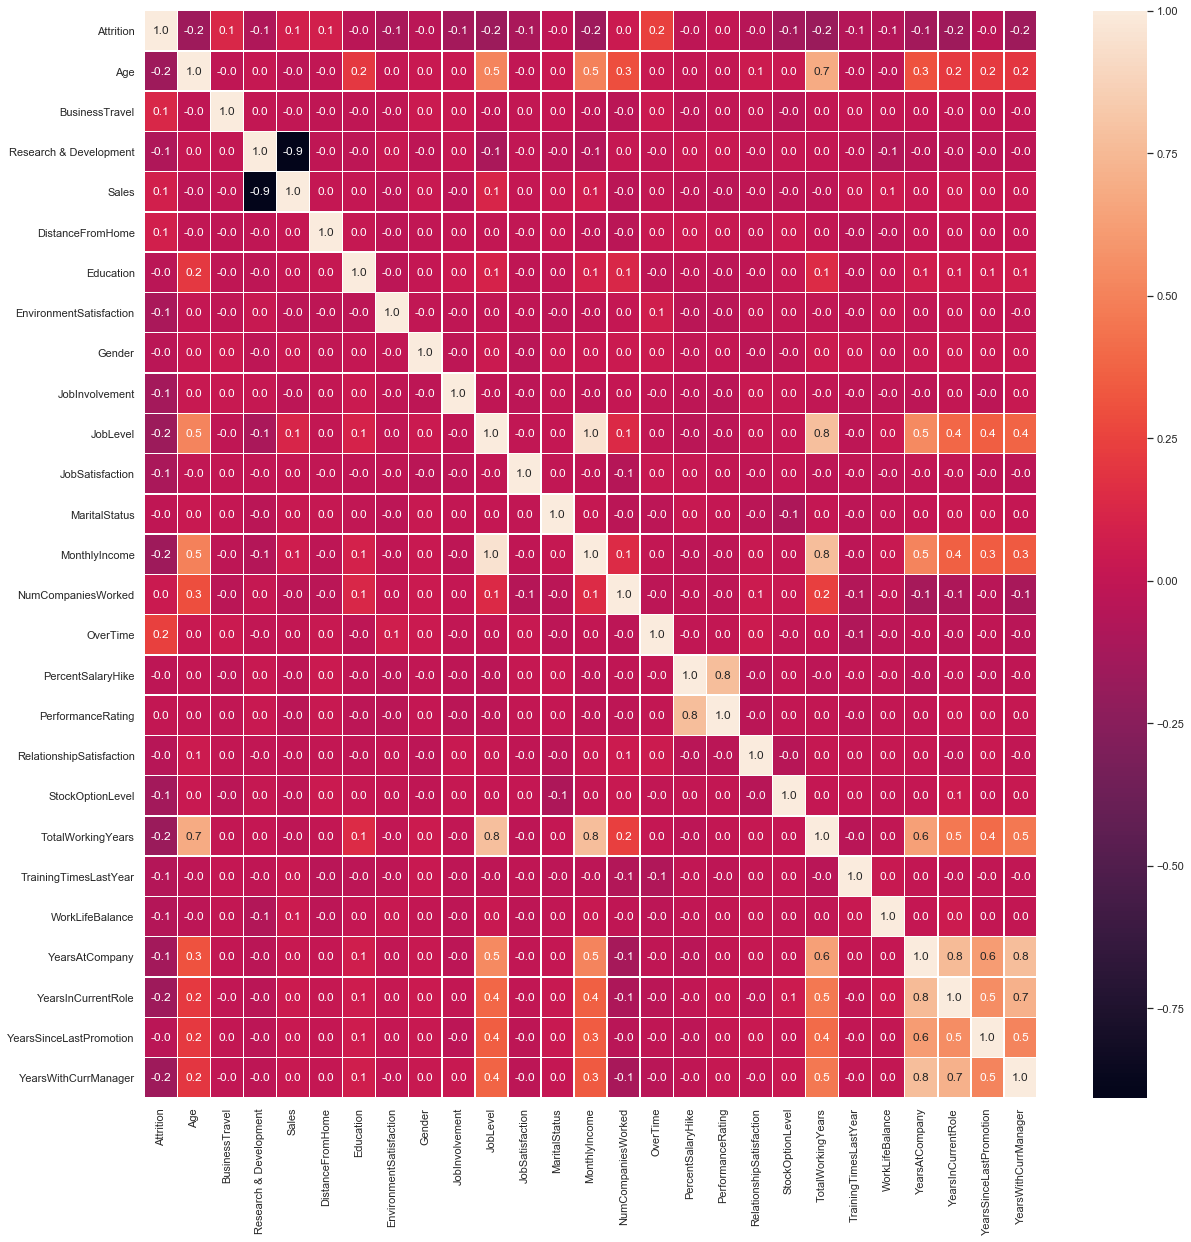

In [51]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), linewidths=.5, fmt='.1f', annot=True, ax=ax);

We need to drop some columns otherwise our model may face multicollinearity

In [52]:
checkpoint_7 = data.copy()

In [53]:
data.drop(['JobLevel', 'YearsAtCompany'], axis=1, inplace=True)

In [54]:
data.drop('YearsInCurrentRole', axis=1, inplace=True)

In [55]:
data.drop('TotalWorkingYears', axis=1, inplace=True)

In [56]:
data.drop('PerformanceRating', axis=1, inplace=True)

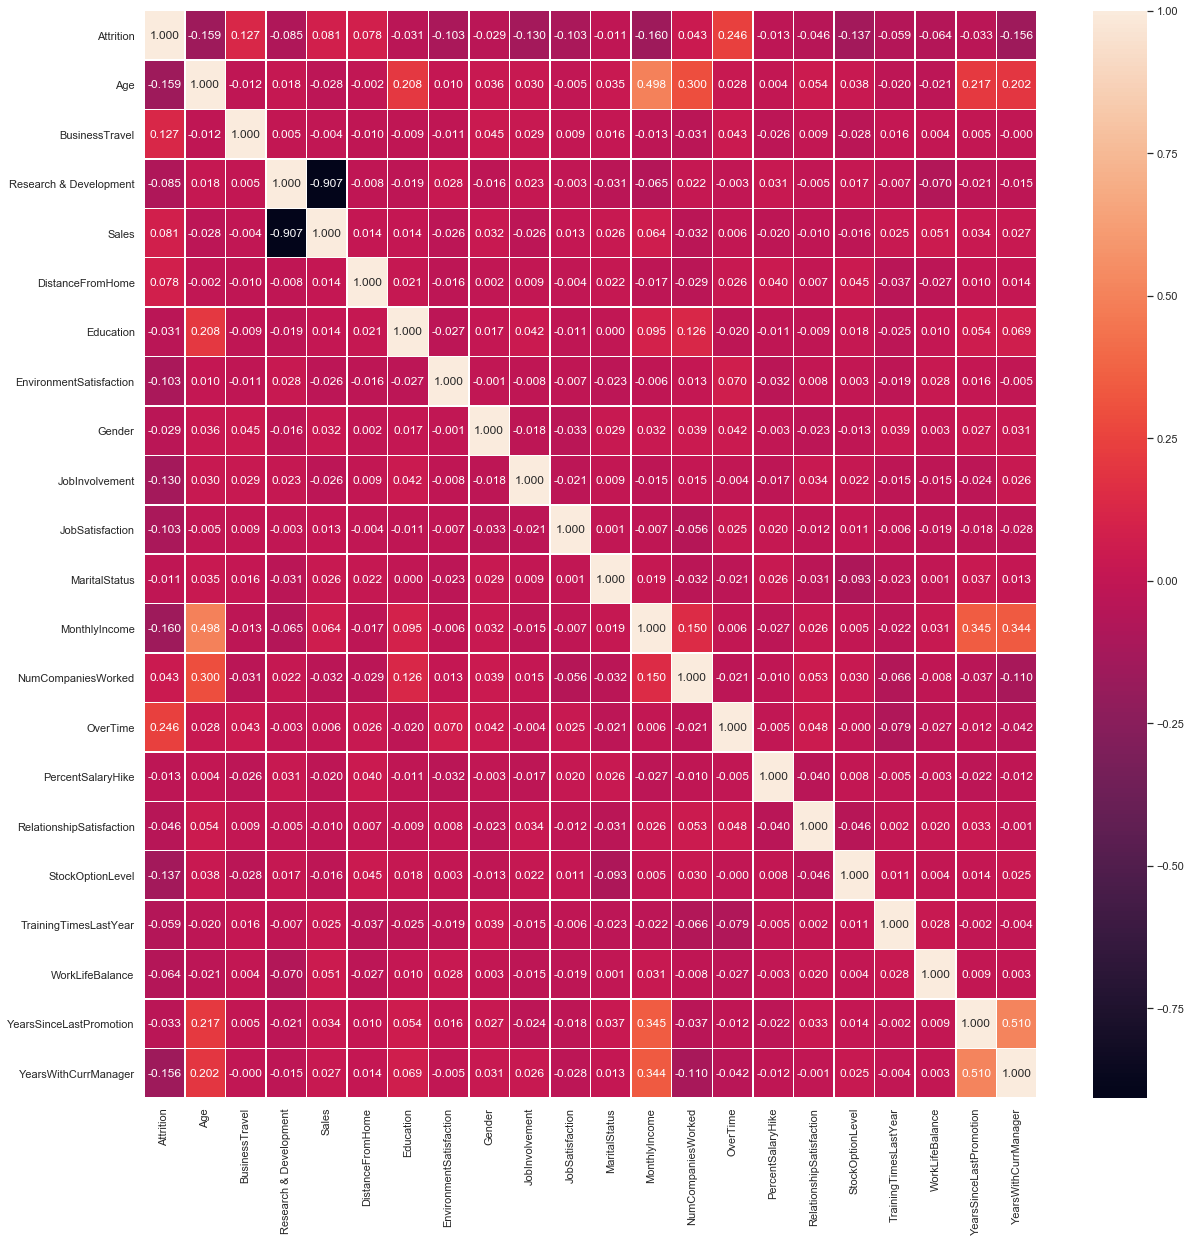

In [57]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), linewidths=.5, fmt='.3f', annot=True, ax=ax);

Thus, we have removed multicollinearity from our model

In [58]:
data.head()

,Attrition,Age,BusinessTravel,Research & Development,Sales,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,0,1,1,2,2,1,3,4,1,5993,8,1,11,1,0,0,1,0,5
1,0,49,2,1,0,8,1,3,0,2,2,2,5130,1,0,23,4,1,3,3,1,7
2,1,37,1,1,0,2,2,4,0,2,3,1,2090,6,1,15,2,0,3,3,0,0
3,0,33,2,1,0,3,4,4,1,3,3,2,2909,1,1,11,3,0,3,3,3,0
4,0,27,1,1,0,2,1,1,0,3,2,2,3468,9,0,12,4,1,3,3,2,2


Thus, our dataset is succesfully preprocessed

In [60]:
data.to_csv('employee_attrition_preprocessed.csv', index=False)